In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


# Reading Data Source

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [3]:
len(df.index)

2382

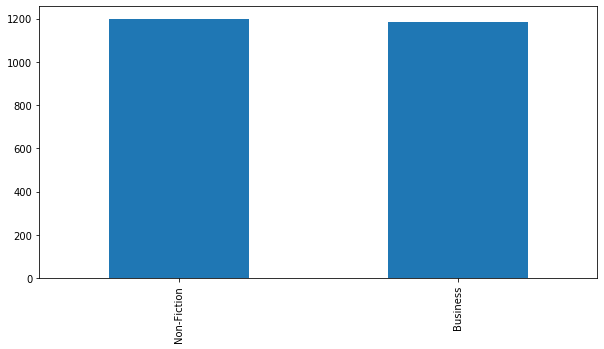

In [4]:
df['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar', figsize = (10,5)  )

In [5]:
# Removing duplicate books
cleaned_df = df['title'].unique()
#filter out specific columns
cleaned_df = df.loc[:, ['Desc', 'author', 'genre', 'image_link', 'rating', 'title']]
cleaned_df.head(5)


,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [6]:
cleaned_df.isnull().sum()

Desc          0
author        0
genre         0
image_link    0
rating        0
title         0
dtype: int64

In [7]:
#remove leading and trailing spaces
cleaned_df['Desc'] = cleaned_df['Desc'].str.strip()
cleaned_df['author'] = cleaned_df['author'].str.strip()
cleaned_df['genre'] = cleaned_df['genre'].str.strip()
cleaned_df['image_link'] = cleaned_df['image_link'].str.strip()
# cleaned_df['rating'] = cleaned_df['rating'].str.strip()
cleaned_df['title'] = cleaned_df['title'].str.strip()

In [8]:
#convert to lowercase
cleaned_df['Desc'] = cleaned_df['Desc'].str.lower()
cleaned_df['author'] = cleaned_df['author'].str.lower()
cleaned_df['genre'] = cleaned_df['genre'].str.lower()
cleaned_df['image_link'] = cleaned_df['image_link'].str.lower()
# cleaned_df['rating'] = cleaned_df['rating'].str.strip()
cleaned_df['title'] = cleaned_df['title'].str.lower()
cleaned_df.head(5)

,Desc,author,genre,image_link,rating,title
0,we know that power is shifting: from west to e...,moisés naím,business,https://i.gr-assets.com/images/s/compressed.ph...,3.63,the end of power: from boardrooms to battlefie...
1,following the success of the accidental billio...,blake j. harris,business,https://i.gr-assets.com/images/s/compressed.ph...,3.94,"console wars: sega, nintendo, and the battle t..."
2,how to tap the power of social software and ne...,chris brogan,business,https://i.gr-assets.com/images/s/compressed.ph...,3.78,trust agents: using the web to build influence...
3,william j. bernstein is an american financial ...,william j. bernstein,business,https://i.gr-assets.com/images/s/compressed.ph...,4.20,the four pillars of investing
4,amazing book. and i joined steve jobs and many...,akio morita,business,https://i.gr-assets.com/images/s/compressed.ph...,4.05,made in japan: akio morita and sony


In [9]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

cleaned_df['Desc'] = df.Desc.apply(_removeNonAscii)
cleaned_df['Desc'] = df.Desc.apply(func = remove_stop_words)
cleaned_df['Desc'] = df.Desc.apply(func = remove_html)
cleaned_df.head(5)

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,moisés naím,business,https://i.gr-assets.com/images/s/compressed.ph...,3.63,the end of power: from boardrooms to battlefie...
1,Following the success of The Accidental Billio...,blake j. harris,business,https://i.gr-assets.com/images/s/compressed.ph...,3.94,"console wars: sega, nintendo, and the battle t..."
2,How to tap the power of social software and ne...,chris brogan,business,https://i.gr-assets.com/images/s/compressed.ph...,3.78,trust agents: using the web to build influence...
3,William J. Bernstein is an American financial ...,william j. bernstein,business,https://i.gr-assets.com/images/s/compressed.ph...,4.20,the four pillars of investing
4,Amazing book. And I joined Steve Jobs and many...,akio morita,business,https://i.gr-assets.com/images/s/compressed.ph...,4.05,made in japan: akio morita and sony


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
# vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')

vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df = 5, stop_words='english')
# tfidf_matrix = vectorizer.fit_transform(cleaned_df['Desc'])
tfidf_matrix = vectorizer.fit(cleaned_df['Desc'])
tfidf_matrix

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
pd.DataFrame(cosine_sim)

In [136]:
# books = df[['title', 'image_link']]
# indices = pd.Series(cleaned_df.index, index = cleaned_df['title']).drop_duplicates()
# # indices = pd.Series(data.index, index = data['title'])
# idx = indices[title]
# #indices.head(5)

In [16]:
#get the book name
book_title = "How to Master the Art of Selling"
book_title = book_title.lower()
#check if book exits and it is unique
book_title in cleaned_df['title'].unique()

True

In [17]:
#get the index value of the book in data dataframe
book_index = cleaned_df.loc[cleaned_df['title'] == book_title].index[0]
book_index

60

In [18]:
#get the similarity score for this particular book
sim = cosine_sim[book_index]
sim_lst = list(enumerate(cosine_sim[book_index]))
# sorting this list in decreasing order based on the similarity score
sim_lst = sorted(sim_lst, key = lambda x:x[1] ,reverse=True)
# removing the first index since it is the same book
sim_lst = sim_lst[1:6]
print("List of top 5 recommended books in decreasing similarity order")
sim_lst


List of top 5 recommended books in decreasing similarity order


[(712, 0.253057568503188),
 (990, 0.1870636974010201),
 (289, 0.180564218763853),
 (190, 0.17821831837989272),
 (238, 0.16964475559770612)]

In [19]:
# sotre all 5 book recommendations in a list
rec_list = []
# print("Top 5 Recommended Books:\n")
for i in range(len(sim_lst)):
    a = sim_lst[i][0]
    rec_list.append(cleaned_df['title'][a])
#     print(cleaned_df['title'][a] + '\n')
    



In [20]:
# printing the details of a similar book - Example
print(cleaned_df.loc[[323]])

                                                  Desc        author  \
323  Lawrence Cunningham, who goes by Larry, has pu...  alex banayan   

        genre                                         image_link  rating  \
323  business  https://i.gr-assets.com/images/s/compressed.ph...    4.27   

                                                 title  
323  the third door: the wild quest to uncover how ...  


# Top-5 Recommendations

In [21]:
cleaned_df[cleaned_df['title'].isin(rec_list)]

,Desc,author,genre,image_link,rating,title
190,"In YOU, INC. Beckwith provides practical tips,...",jack d. schwager,business,https://i.gr-assets.com/images/s/compressed.ph...,4.22,market wizards
238,Write Well to Sell Big!In the age of e-mail an...,kevin freiberg,business,https://i.gr-assets.com/images/s/compressed.ph...,3.91,nuts!
289,The Book That Sparked A Selling Revolution In ...,al ries,business,https://i.gr-assets.com/images/s/compressed.ph...,4.05,focus: the future of your company depends on it
712,The international bestseller that revolutioniz...,neil rackham,business,https://i.gr-assets.com/images/s/compressed.ph...,3.98,spin selling: situation problem implication ne...
990,The ability to sell others is as critical to y...,clayton m. christensen,business,https://i.gr-assets.com/images/s/compressed.ph...,4.02,hbr's 10 must reads on managing yourself (with...
